<a href="https://colab.research.google.com/github/Marvin2798/CNN-Project-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Link : https://github.com/ironhack-labs/project-1-deep-learning-image-classification-with-cnn/blob/main/README.md#project-i--deep-learning-image-classification-with-cnn

1. Loading and Data Processing

In [73]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [74]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [75]:
# Import to_categorical
from tensorflow.keras.utils import to_categorical  # Import to_categorical

In [76]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

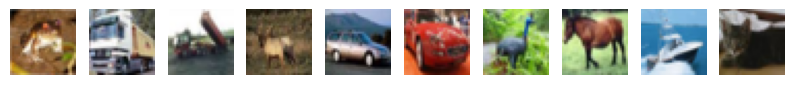

In [77]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()


2. Model Architecture

In [78]:
!pip install tensorflow-addons

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomTranslation, RandomContrast, GaussianNoise, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow_addons.optimizers import RectifiedAdam  # Correct import for RectifiedAdam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

# Initial learning rate for Rectified Adam
initial_learning_rate = 1e-4

# Define the model with enhanced data augmentation
model = Sequential()
model.add(Input(shape=(32, 32, 3)))

# Advanced data augmentation layers
model.add(tf.keras.layers.RandomFlip("horizontal"))   # Flip the image horizontally
model.add(tf.keras.layers.RandomRotation(0.2))        # Rotate the image by 20%
model.add(tf.keras.layers.RandomZoom(0.2))            # Zoom the image by 20%
model.add(RandomContrast(0.2))                        # Adjust contrast by 20%
model.add(GaussianNoise(0.1))                         # Add Gaussian noise
# Removed RandomBrightness since it caused an issue
model.add(RandomTranslation(0.05, 0.05))              # Translate the image by 5%

# First Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))  # Increased filters to 64
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Second Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))  # Increased filters to 128
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Third Convolutional Block
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))  # Increased filters to 256
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Fourth Convolutional Block
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))  # Increased filters to 512
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))  # Increased neurons to 512
#model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.3))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model with Rectified Adam optimizer
model.compile(optimizer=RectifiedAdam(lr=initial_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_7 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_rotation_7 (RandomR  (None, 32, 32, 3)         0         
 otation)                                                        
                                                                 
 random_zoom_7 (RandomZoom)  (None, 32, 32, 3)         0         
                                                                 
 random_contrast_7 (RandomC  (None, 32, 32, 3)         0         
 ontrast)                                                        
                                                                 
 gaussian_noise_7 (Gaussian  (None, 32, 32, 3)         0         
 Noise)                                                          
                                                     

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/optimizers/rectified_adam.py:121: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3. Model Training

In [79]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)

# Reduce learning rate when the validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Model checkpoint to save the best model based on validation loss
checkpoint = ModelCheckpoint(filepath='best_model.keras', monitor="val_loss", mode="min", save_best_only=True, verbose=1)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, checkpoint, reduce_lr])


Epoch 1/50
781/782 [============================>.] - ETA: 0s - loss: 3.8480 - accuracy: 0.2583
Epoch 1: val_loss improved from inf to 3.49593, saving model to best_model.keras
782/782 [==============================] - 67s 83ms/step - loss: 3.8477 - accuracy: 0.2584 - val_loss: 3.4959 - val_accuracy: 0.3720 - lr: 1.0000e-04
Epoch 2/50
781/782 [============================>.] - ETA: 0s - loss: 3.4671 - accuracy: 0.3556
Epoch 2: val_loss improved from 3.49593 to 3.19106, saving model to best_model.keras
782/782 [==============================] - 64s 82ms/step - loss: 3.4670 - accuracy: 0.3556 - val_loss: 3.1911 - val_accuracy: 0.4451 - lr: 1.0000e-04
Epoch 3/50
781/782 [============================>.] - ETA: 0s - loss: 3.2596 - accuracy: 0.3979
Epoch 3: val_loss improved from 3.19106 to 3.06396, saving model to best_model.keras
782/782 [==============================] - 63s 81ms/step - loss: 3.2595 - accuracy: 0.3979 - val_loss: 3.0640 - val_accuracy: 0.4484 - lr: 1.0000e-04
Epoch 4/50



  4. Model Evaluation



In [80]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


313/313 [==============================] - 4s 12ms/step - loss: 1.0450 - accuracy: 0.7331
Validation Loss: 1.0449779033660889
Validation Accuracy: 0.7330999970436096


In [81]:
from sklearn.metrics import classification_report

# Predict the labels on the validation set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Print the classification report
print(classification_report(y_true, y_pred_classes))


313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1000
           1       0.81      0.86      0.84      1000
           2       0.73      0.54      0.62      1000
           3       0.69      0.48      0.56      1000
           4       0.79      0.56      0.66      1000
           5       0.65      0.68      0.67      1000
           6       0.70      0.86      0.77      1000
           7       0.74      0.80      0.77      1000
           8       0.83      0.86      0.85      1000
           9       0.71      0.83      0.77      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



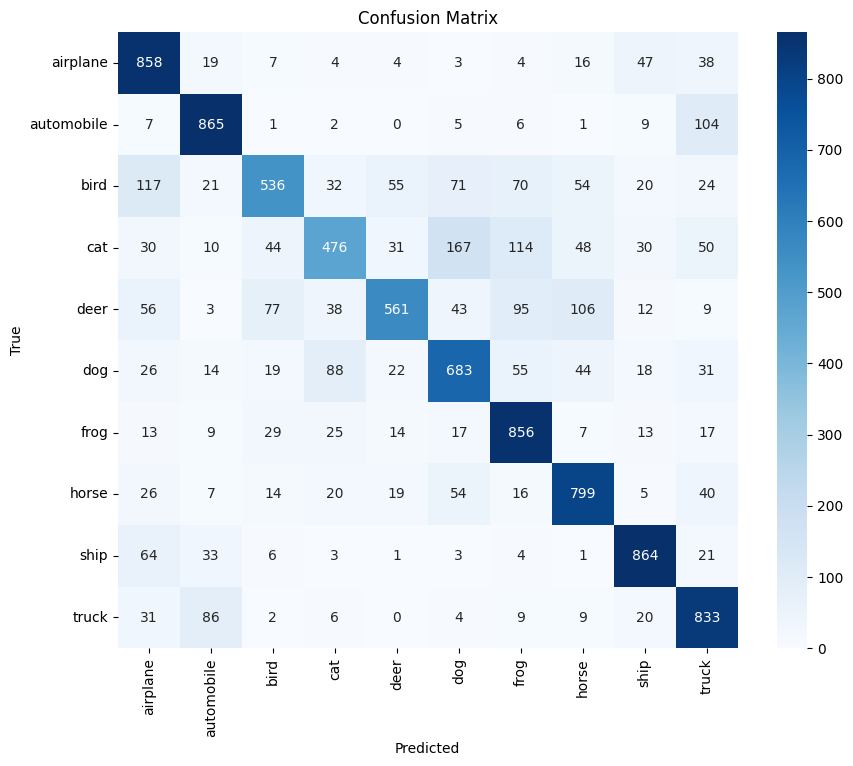

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Transfer Learning using VGG16

In [83]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data (VGG16 expects input range from 0 to 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load VGG16 pre-trained model without top layers
base_vgg16 = VGG16(include_top=False, input_shape=(32, 32, 3), weights='imagenet')

# Freeze all layers except the last few
for layer in base_vgg16.layers[:-10]:  # Unfreeze the last 10 layers for fine-tuning
    layer.trainable = False

# Create a new model and add VGG16 as the base
model = Sequential([
    base_vgg16,                    # Corrected to use VGG16 as the base model
    Flatten(),                      # Flatten the VGG16 output
    Dense(256, activation='relu'),   # New fully connected layer
    Dropout(0.5),                   # Dropout for regularization
    Dense(128, activation='relu'),   # Another fully connected layer
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for CIFAR-10 (10 classes)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5),  # Updated learning rate parameter
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tuning callbacks
fine_tune_early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=False)
fine_tune_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)
checkpoint = ModelCheckpoint(filepath='finetuned_model.keras', monitor="val_loss", mode="min", save_best_only=True, verbose=1)

# Fine-tune the model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=50,
          batch_size=64,
          callbacks=[fine_tune_reduce_lr, fine_tune_early_stopping, checkpoint])  # Added checkpoint to callbacks

# Summarize the model architecture
model.summary()



Epoch 1/50
782/782 [==============================] - ETA: 0s - loss: 1.8096 - accuracy: 0.3589
Epoch 1: val_loss improved from inf to 1.06084, saving model to finetuned_model.keras
782/782 [==============================] - 196s 247ms/step - loss: 1.8096 - accuracy: 0.3589 - val_loss: 1.0608 - val_accuracy: 0.6594 - lr: 1.0000e-05
Epoch 2/50
782/782 [==============================] - ETA: 0s - loss: 1.1887 - accuracy: 0.6112
Epoch 2: val_loss improved from 1.06084 to 0.84113, saving model to finetuned_model.keras
782/782 [==============================] - 199s 255ms/step - loss: 1.1887 - accuracy: 0.6112 - val_loss: 0.8411 - val_accuracy: 0.7224 - lr: 1.0000e-05
Epoch 3/50
782/782 [==============================] - ETA: 0s - loss: 0.9877 - accuracy: 0.6870
Epoch 3: val_loss improved from 0.84113 to 0.74592, saving model to finetuned_model.keras
782/782 [==============================] - 195s 249ms/step - loss: 0.9877 - accuracy: 0.6870 - val_loss: 0.7459 - val_accuracy: 0.7556 - lr: 1

In [84]:
# Loads the weights
model.load_weights('finetuned_model.keras')

In [85]:
#Evaluate Model Performance
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 [==============================] - 13s 41ms/step - loss: 0.6142 - accuracy: 0.8057
Test Loss: 0.6142141819000244
Test Accuracy: 0.8057000041007996


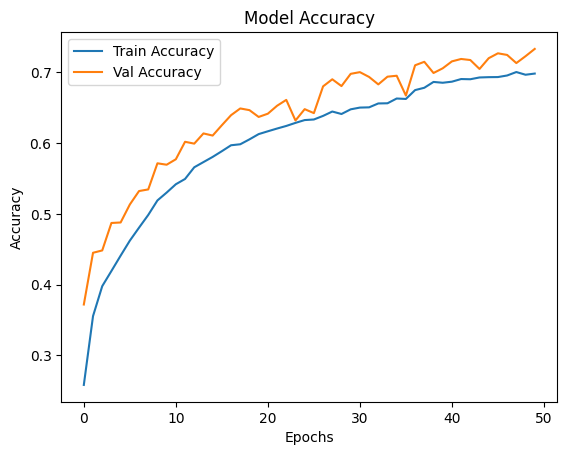

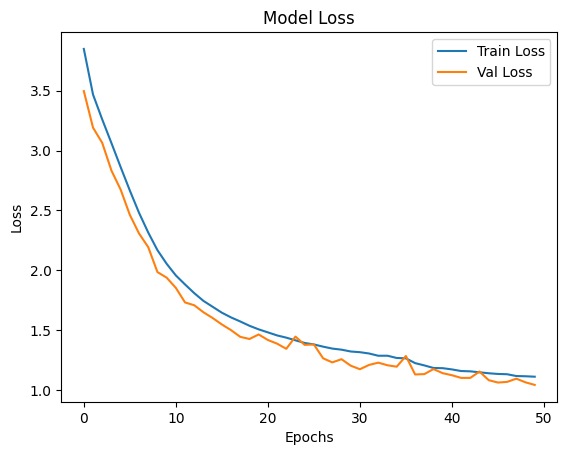

In [86]:
#visualize the training and validation accuracy and loss to see how well the model has learned
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [87]:
#Save the best model. ModelCheckpoint - (best_model.keras) contains the version with the lowest validation loss.
from tensorflow.keras.models import load_model

# Load the saved best model
best_model = load_model('best_model.keras')


In [88]:
# Unfreeze the last few layers of the VGG16 model for fine-tuning
for layer in base_vgg16.layers[:-20]:  # Keeping the earlier layers frozen
    layer.trainable = False

# Make the last few layers trainable
for layer in base_vgg16.layers[-20:]:  # Unfreeze the last 10 layers
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for reducing learning rate and early stopping (make sure these are defined earlier)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=False)

# Train the model (fine-tune)
history_fine_tune = model.fit(X_train, y_train,
                              epochs=20,
                              batch_size=64,
                              validation_data=(X_test, y_test),
                              callbacks=[reduce_lr, early_stopping])



Epoch 1/20
782/782 [==============================] - 236s 299ms/step - loss: 0.5369 - accuracy: 0.8375 - val_loss: 0.6228 - val_accuracy: 0.8080 - lr: 1.0000e-05
Epoch 2/20
782/782 [==============================] - 232s 297ms/step - loss: 0.4783 - accuracy: 0.8547 - val_loss: 0.5961 - val_accuracy: 0.8165 - lr: 1.0000e-05
Epoch 3/20
782/782 [==============================] - 232s 297ms/step - loss: 0.4278 - accuracy: 0.8692 - val_loss: 0.6075 - val_accuracy: 0.8204 - lr: 1.0000e-05
Epoch 4/20
782/782 [==============================] - 232s 297ms/step - loss: 0.3855 - accuracy: 0.8837 - val_loss: 0.6365 - val_accuracy: 0.8152 - lr: 1.0000e-05
Epoch 5/20
782/782 [==============================] - 232s 297ms/step - loss: 0.3396 - accuracy: 0.8983 - val_loss: 0.6507 - val_accuracy: 0.8195 - lr: 1.0000e-05
Epoch 6/20
782/782 [==============================] - 233s 297ms/step - loss: 0.2997 - accuracy: 0.9104 - val_loss: 0.6257 - val_accuracy: 0.8216 - lr: 1.0000e-05
Epoch 7/20
782/782 [==

313/313 [==============================] - 11s 36ms/step


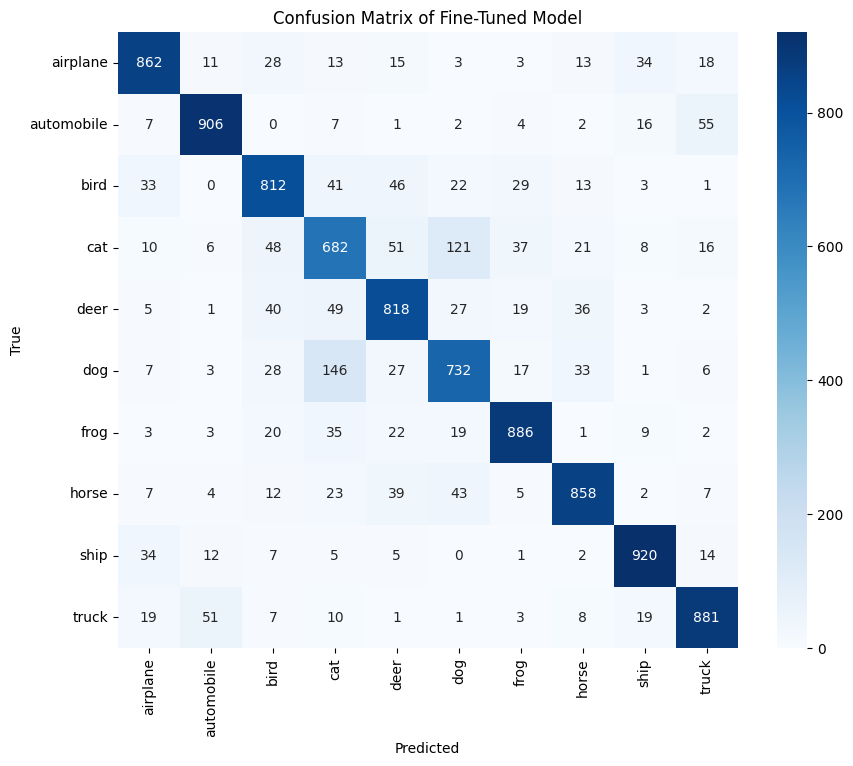

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)  # Use 'model' as this is the fine-tuned model
y_pred_classes_fine_tuned = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)  # Assuming one-hot encoding for y_test

# Generate the confusion matrix for the fine-tuned model


cm_fine_tuned = confusion_matrix(y_true, y_pred_classes_fine_tuned)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fine_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Fine-Tuned Model')
plt.show()


Fine-tuning to help the model adapt the pre-trained knowledge to ours

Comparing Confusion Matrices Before and After Fine-Tuning


313/313 [==============================] - 12s 38ms/step
Confusion Matrix for Original Model:


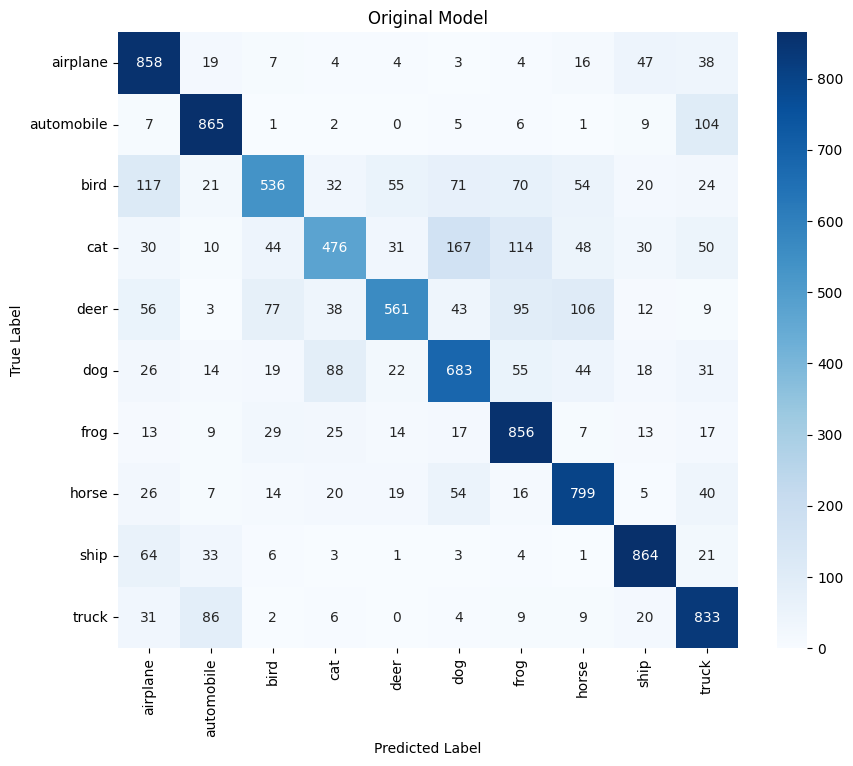

Confusion Matrix for Fine-Tuned Model (VGG16):


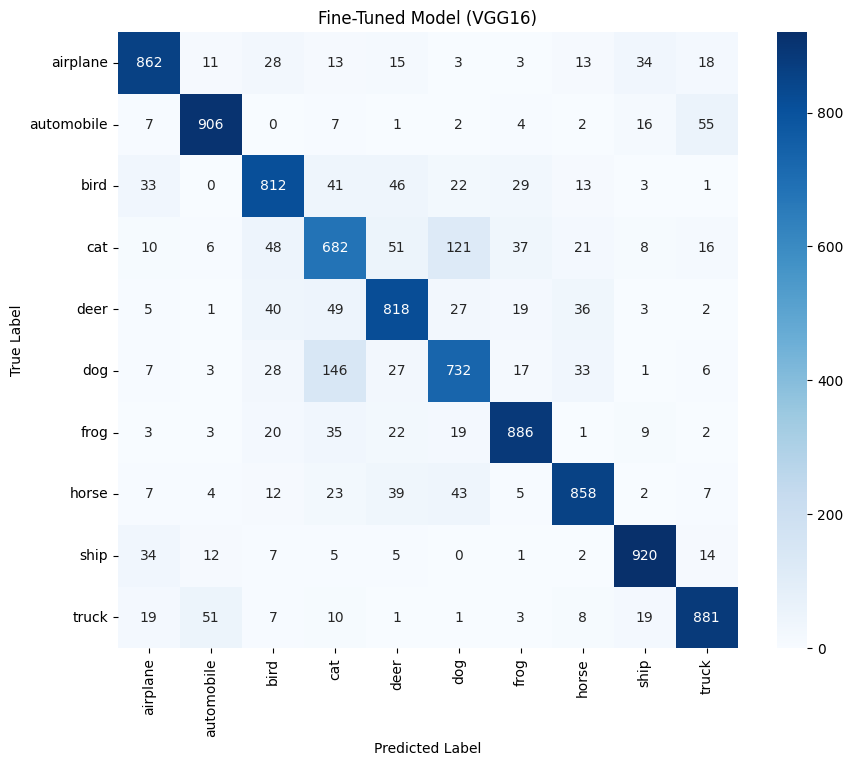

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the original model from the saved file
original_model = load_model('best_model.keras')

# Predictions for the original CNN model
y_true = np.argmax(y_test, axis=1)  # True labels
y_pred_original = np.argmax(original_model.predict(X_test), axis=1)  # Original model predictions

# Predictions for the VGG16 transfer learning model
y_pred_transfer = np.argmax(model.predict(X_test), axis=1)  # VGG16 predictions

# Compute confusion matrices for both models
conf_matrix_original = confusion_matrix(y_true, y_pred_original)
conf_matrix_transfer = confusion_matrix(y_true, y_pred_transfer)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cifar10_class_names, yticklabels=cifar10_class_names)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# CIFAR-10 class names
cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot and compare the confusion matrices
print("Confusion Matrix for Original Model:")
plot_confusion_matrix(conf_matrix_original, "Original Model")

print("Confusion Matrix for Fine-Tuned Model (VGG16):")
plot_confusion_matrix(conf_matrix_transfer, "Fine-Tuned Model (VGG16)")

Plotting history before and after fine-tuning